# Titanic Survival Prediction using Decision Tree

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report


In [40]:
url="https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv"
titanic = pd.read_csv(url)

In [41]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [42]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [43]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [44]:
titanic.shape

(891, 12)

In [45]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [46]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [47]:
df=titanic[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare']]

In [48]:
df.Age.fillna(df.Age.mean(),inplace=True)

C:\Users\Vignesh\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


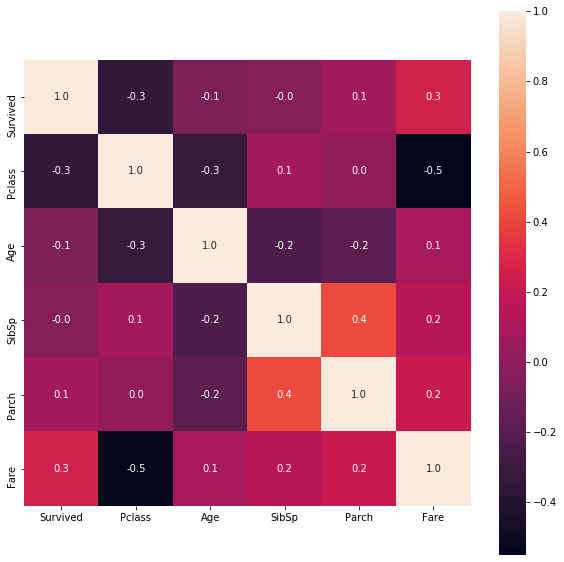

In [49]:
plt.figure(figsize=(10,10))
sns.heatmap(df.select_dtypes(include=['int64','float64']).corr(),square=True,annot=True,fmt='0.1f')

Text(0.5, 1.0, 'survival rate sex')

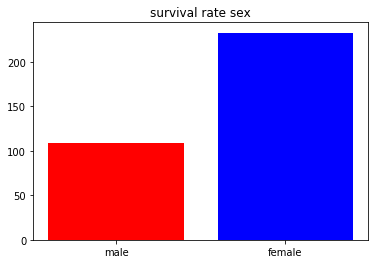

In [50]:
male_sur=df[(df['Survived']==1) & (df['Sex']=='male')]['Survived'].count()
female_sur=df[(df['Survived']==1) & (df['Sex']=='female')]['Survived'].count()

plt.bar(df['Sex'].unique(),[male_sur,female_sur],color=['red','b'])
plt.title('survival rate sex')

male_sur=df[(df['Survived']==1) & (df['Sex']=='male')]['Survived'].count()
female_sur=df[(df['Survived']==1) & (df['Sex']=='female')]['Survived'].count()
plt.bar(df['Sex'].unique(),[male_sur,female_sur],color=['red','b'])
plt.title('survival rate sex')

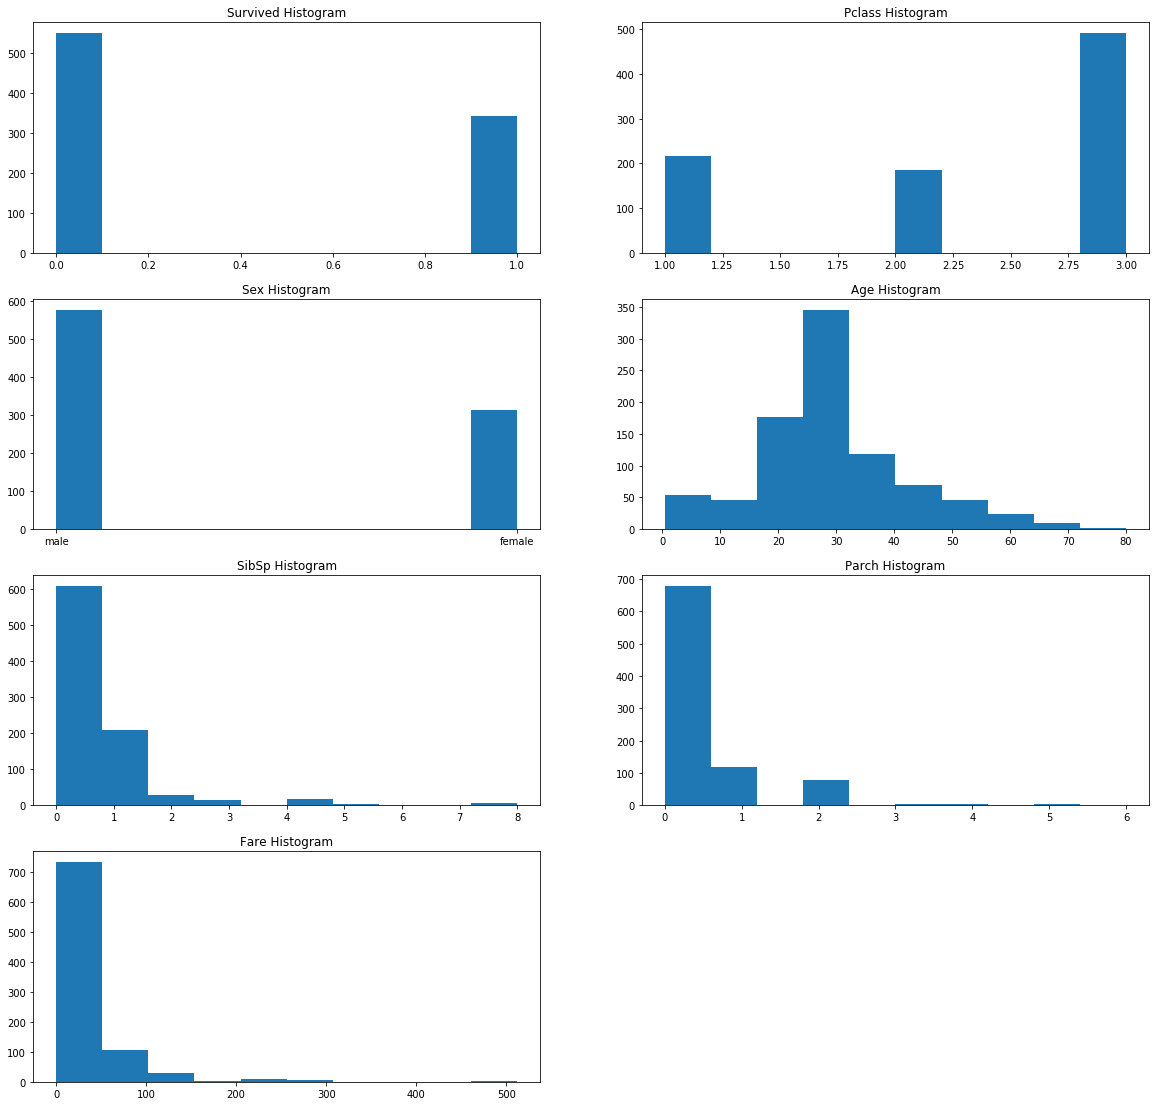

In [51]:
incr=1
plt.figure(figsize=(20,50))
for cols in df.columns:
        plt.subplot(10,2,incr)
        plt.hist(df[cols])
        plt.title('{} Histogram'.format(cols))
        incr+=1

In [52]:
df.Sex=df['Sex'].map({'male':0,'female':1})

C:\Users\Vignesh\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [53]:
x=df.drop(columns='Survived')
y=df.Survived

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=3)

In [55]:
#without gridsearch hypermeter tuning
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.7892376681614349

In [56]:

grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [57]:
grid_search=GridSearchCV(estimator=clf,param_grid=grid_param,cv=5,n_jobs=-1)
grid_search.fit(x_train,y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [58]:
tree_best_params=grid_search.best_params_
print(tree_best_params)

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 3, 'splitter': 'best'}


In [59]:
grid_search.best_score_

0.8398159578049601

In [60]:
#with gridsearch hypermeter tuning
clf=DecisionTreeClassifier(**tree_best_params)
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.7937219730941704

Text(0.5, 1.0, 'Feature Importance')

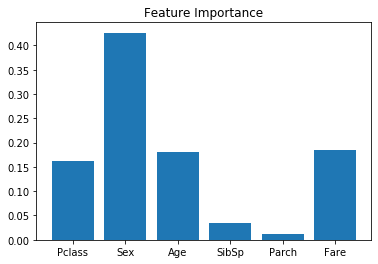

In [61]:
plt.bar(x.columns,clf.feature_importances_)
plt.title('Feature Importance')

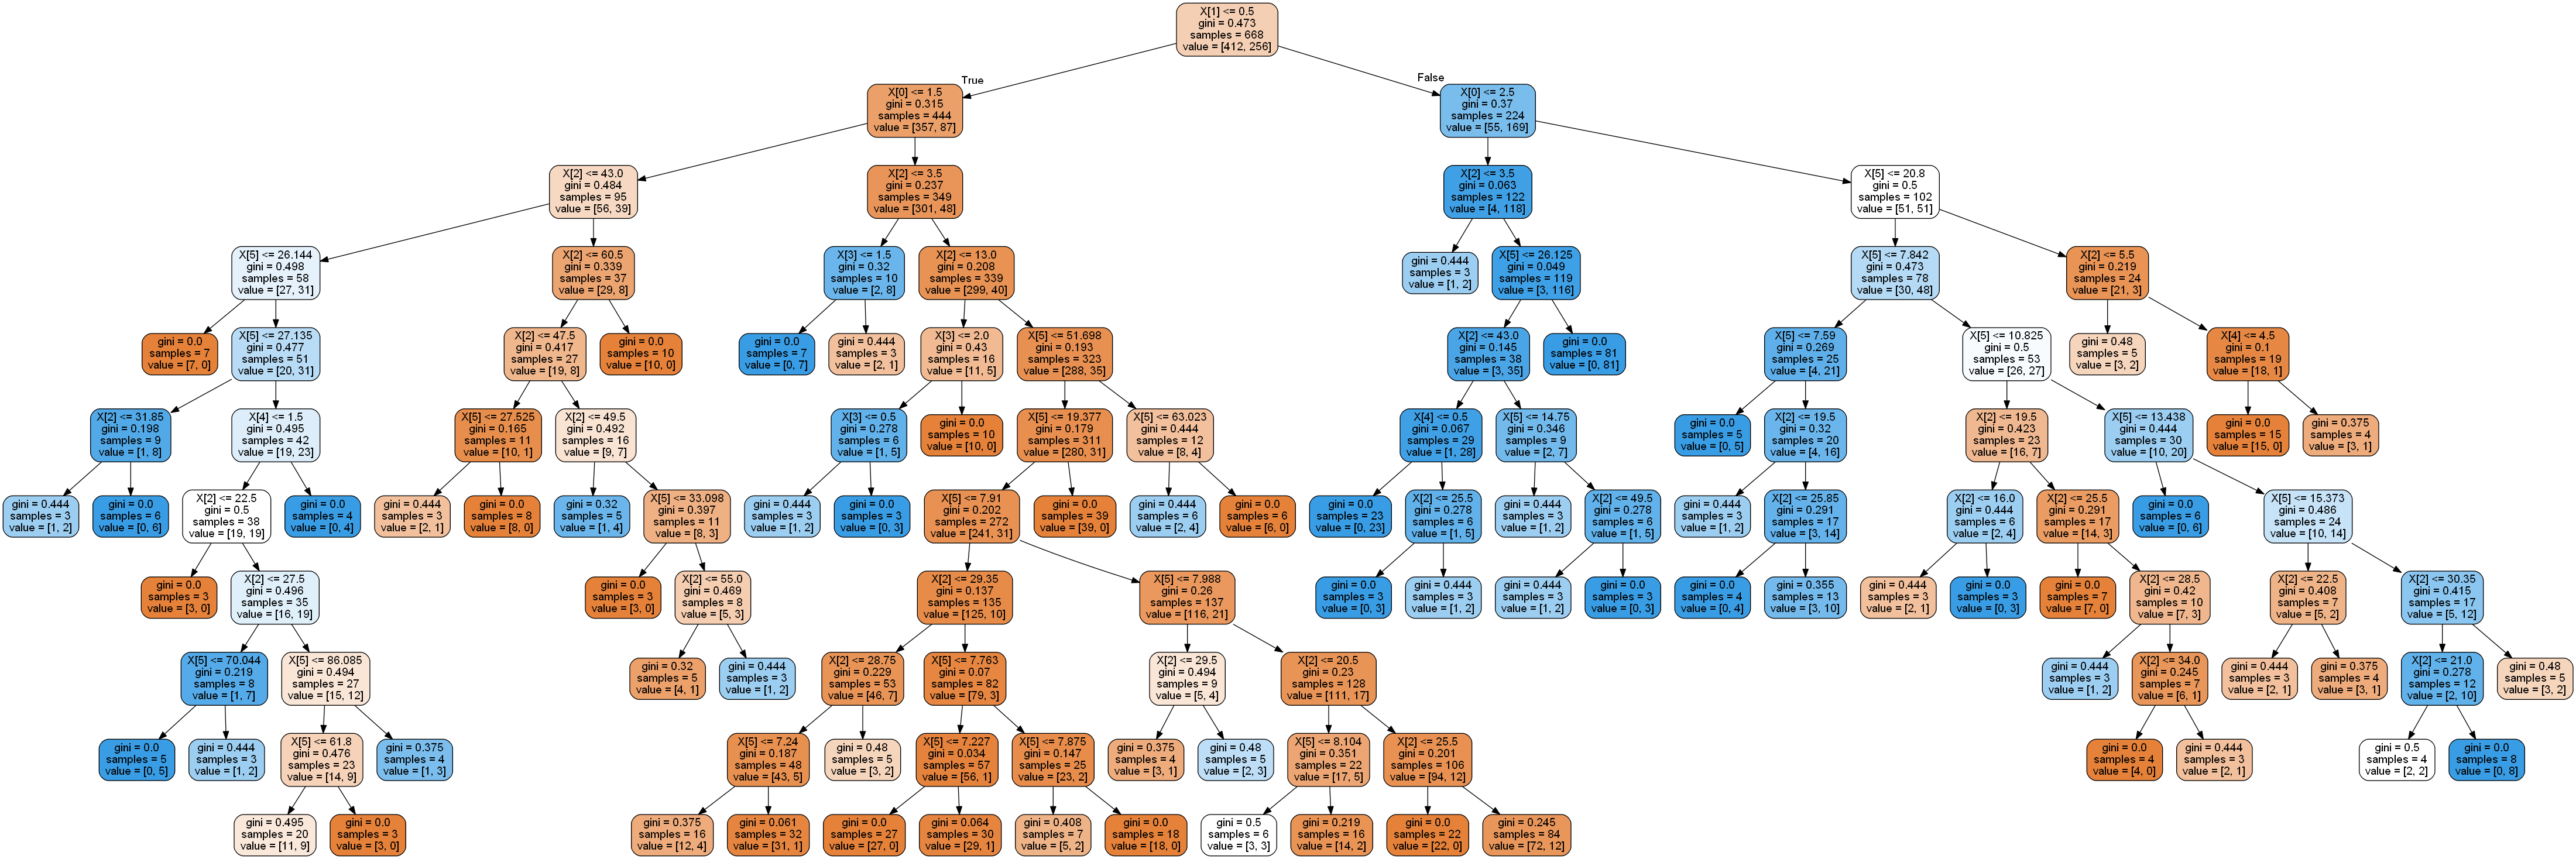

In [62]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image  
feature_name=list(x.columns)
class_name = list(y_train.unique())
# create a dot_file which stores the tree structure
dot_data = export_graphviz(clf,rounded = True,filled = True)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
#graph.write_png("tree.png")
# Show graph
Image(graph.create_png())

In [63]:
from sklearn.metrics import accuracy_score
y_pred=clf.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print('accuracy: {}'.format(accuracy))
print('Confusion Matrix:\n',metrics.confusion_matrix(y_test,y_pred))
print('Report:\n',metrics.classification_report(y_test,y_pred))

accuracy: 0.7937219730941704
Confusion Matrix:
 [[118  19]
 [ 27  59]]
Report:
               precision    recall  f1-score   support

           0       0.81      0.86      0.84       137
           1       0.76      0.69      0.72        86

    accuracy                           0.79       223
   macro avg       0.79      0.77      0.78       223
weighted avg       0.79      0.79      0.79       223



In [64]:
from sklearn.model_selection import cross_val_score
cross_val=cross_val_score(clf,x,y,scoring='accuracy',cv=10)
print('cross validation scores: ',cross_val)
print('cross validation mean: ',cross_val.mean())

cross validation scores:  [0.76666667 0.82022472 0.71910112 0.82022472 0.88764045 0.83146067
 0.84269663 0.7752809  0.8988764  0.85393258]
cross validation mean:  0.8216104868913858
